<a href="https://colab.research.google.com/github/Morilla123/Curso/blob/main/Prepros_simple%26double_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import librares

In [1]:
%%capture
!pip install opencv-python-headless=='4.1.2.30'
!pip install easyocr
!pip install imutils
!pip install torch

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

import numpy as np                   # math library
import matplotlib.pyplot as plt      
import random                        # for generating random numbers
from google.colab.patches import cv2_imshow
import tensorflow as tf
import seaborn as sns
import cv2
import imutils

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils  
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)

## test

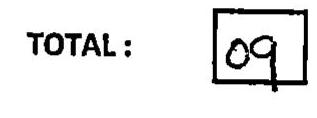

(118, 317, 3)


In [41]:
img = cv2.imread('/content/09.jpg')
cv2_imshow(img)
print(img.shape)

In [85]:
img = cv2.imread('/content/11.jpg')
hight,width,_ = img.shape 
img = img[0:hight,int(width/2):width]
dim = (hight,hight)
img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # es posible que esta linea no la necesitemos
img = cv2.Canny(img, 250, 250)

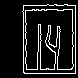

(78, 78)


In [81]:
cv2_imshow(img)
print(img.shape)

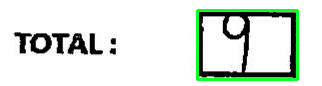

(104, 104)


In [102]:
cv2_imshow(image)
print(img.shape)  # tener en cuenta dimension

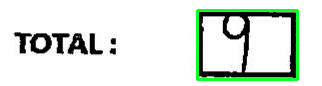

(104, 104)


In [101]:
image = cv2.imread('/content/9.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(gray, 5)
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(blur, -1, sharpen_kernel)

thresh = cv2.threshold(sharpen,160,255, cv2.THRESH_BINARY_INV)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

cnts = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

min_area = 1200
max_area = 15000
image_number = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area and area < max_area:
        x,y,w,h = cv2.boundingRect(c)
        ROI = image[y:y+h, x:x+w]
        cv2.imwrite('ROI_{}.png'.format(image_number), ROI)
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
        image_number += 1

cv2_imshow(image)
print(img.shape)

In [47]:
def angle_cos(p0, p1, p2):
    d1, d2 = (p0-p1).astype('float'), (p2-p1).astype('float')
    return abs( np.dot(d1, d2) / np.sqrt( np.dot(d1, d1)*np.dot(d2, d2) ) )

In [49]:
min_area = 100
max_area = 1500

In [82]:
def find_squares(img):
    img = cv2.GaussianBlur(img, (5, 5), 0)
    squares = []
    for gray in cv2.split(img):
        for thrs in range(0, 255, 26):
            if thrs == 0:
                bin = cv2.Canny(gray, 0, 50, apertureSize=5)
                bin = cv2.dilate(bin, None)
            else:
                _retval, bin = cv2.threshold(gray, thrs, 255, cv2.THRESH_BINARY)

            contours, _hierarchy = cv2.findContours(bin, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
            
            for cnt in contours:
                cnt_len = cv2.arcLength(cnt, True)
                cnt = cv2.approxPolyDP(cnt, 0.02*cnt_len, True)
                if len(cnt) == 4 and cv2.contourArea(cnt) > 1000 and cv2.isContourConvex(cnt):
                    cnt = cnt.reshape(-1, 2)
                    max_cos = np.max([angle_cos( cnt[i], cnt[(i+1) % 4], cnt[(i+2) % 4] ) for i in range(4)])
                    #print(cnt)
                    a = (cnt[1][1] - cnt[0][1])

                    if max_cos < 0.1 and a < img.shape[0]*0.8:

                        squares.append(cnt)
    return squares

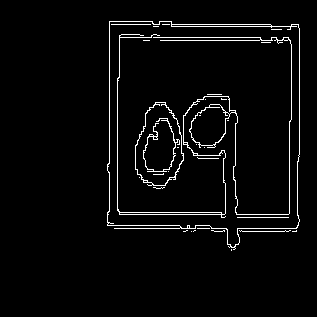

(317, 317)


In [39]:
# img = cv2.imread('/content/07.jpg')
squares = find_squares(img)
cv2.drawContours(img, squares, -1, (0, 255, 0), 3)
cv2_imshow(img)
print(img.shape)

In [79]:
cnts = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

for c in cnts:

    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    if len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
        print('Cuatro puntos')
        # print((x, y, w, h))

    elif len(approx) != 4:
        shape = "pentagon"
        print('Distinto puntos')

Distinto puntos
Distinto puntos
Cuatro puntos
Distinto puntos


In [74]:
approx

array([[[23,  7]],

       [[23, 76]],

       [[80, 77]],

       [[81,  9]]], dtype=int32)

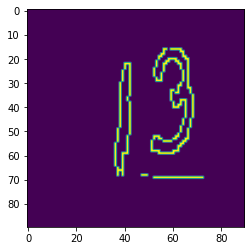

In [77]:
plt.imshow(np.asarray(img))

In [75]:
%%capture
cv2.line(img,(approx[0][0][0],approx[0][0][1]),(approx[1][0][0],approx[1][0][1]),(0,0,0),13)
cv2.line(img,(approx[1][0][0],approx[1][0][1]),(approx[2][0][0],approx[2][0][1]),(0,0,0),13)
cv2.line(img,(approx[2][0][0],approx[2][0][1]),(approx[3][0][0],approx[3][0][1]),(0,0,0),13)
cv2.line(img,(approx[3][0][0],approx[3][0][1]),(approx[0][0][0],approx[0][0][1]),(0,0,0),13)

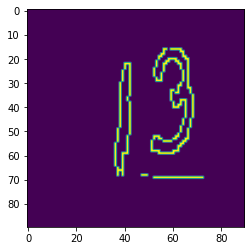

In [76]:
plt.imshow(np.asarray(img))

# test 